# [Создание новых слоев (дополнительно)](https://autogis-site.readthedocs.io/en/latest/notebooks/L2/03-create-geodataframes.html)

##### Поскольку geopandas использует преимущества геометрических объектов Shapely, можно создавать пространственные данные с нуля, передавая геометрические объекты Shapely в GeoDataFrame. Это полезно, Так как позволяет легко конвертировать, например, текстовый файл, содержащий координаты, в слои пространственных данных. Далее мы увидим, как создать новый GeoDataFrame с нуля и сохранить его в Шейп-файл. Наша цель-определить геометрию, которая представляет собой контуры [Сенатской площади в Хельсинки, Финляндия](https://fi.wikipedia.org/wiki/Senaatintori).

Начните с импорта необходимых модулей:

In [3]:
import os
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

from shapely.geometry import Point, Polygon
from pyproj import CRS

# Корректное отображение графиков в jupyter
%matplotlib inline

In [17]:
# новый пустой GeoDataFrame
newdata = gpd.GeoDataFrame()
print(newdata)

Empty GeoDataFrame
Columns: []
Index: []


In [18]:
# добавим полигон в поле 'geometry' пустого GeoDataFrame
newdata.at[0, "location"] = "Helsinki Senate square"

In [19]:
# создадим колонку 'geometry' - пустую
newdata["geometry"] = None

In [20]:
# Координаты Сенатской площади Хельсинки в десятичных градусах
coordinates = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]

POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))


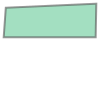

In [21]:
# создадим полигон и нарисуем его
poly = Polygon(coordinates)
print(poly)
poly

In [22]:
# добавим полигон в поле 'geometry' пустого GeoDataFrame
newdata.at[0, "geometry"] = poly
print(newdata)

                 location                                           geometry
0  Helsinki Senate square  POLYGON ((24.95090 60.16916, 24.95349 60.16916...


In [23]:
# проверим CRS
print(newdata.crs)

None


In [24]:
# зададим проекцию WGS84
newdata.crs = CRS.from_epsg(4326).to_wkt()

In [25]:
# проверим CRS
print(newdata.crs)

GEOGCRS["WGS 84",DATUM["World Geodetic System 1984",ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],CS[ellipsoidal,2],AXIS["geodetic latitude (Lat)",north,ORDER[1],ANGLEUNIT["degree",0.0174532925199433]],AXIS["geodetic longitude (Lon)",east,ORDER[2],ANGLEUNIT["degree",0.0174532925199433]],USAGE[SCOPE["unknown"],AREA["World"],BBOX[-90,-180,90,180]],ID["EPSG",4326]]


In [26]:
# Текущая директория
ROOT_PATH = os.path.abspath(os.curdir)

# Папка с данными
fp = os.path.join(ROOT_PATH, r"L2_data\Senaatintori.shp")

# Запись
newdata.to_file(fp)